In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data= "data/mouse_drug_data.csv"
clinical_trial_data = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug = pd.read_csv(mouse_drug_data)
clinical_trial = pd.read_csv(clinical_trial_data)

# Combine the data into a single dataset
pymaceuticals_df=pd.merge(mouse_drug,clinical_trial, on=["Mouse ID"], how="outer")

len_time=len("Timepoint")


# Display the data table for preview

pymaceuticals_df.head()




,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
tumor_table=pymaceuticals_df.groupby(["Drug","Timepoint"])['Tumor Volume (mm3)']

tumor_mean=tumor_table.mean()

# Convert to DataFrame
tumor_mean_df=pd.DataFrame(tumor_mean)

# Preview DataFrame
tumor_mean_df.reset_index(inplace=True)



In [3]:
tumor_mean_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [17]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
tumor_sem=tumor_table.sem()

# Convert to DataFrame
tumor_sem_df=pd.DataFrame(tumor_sem)

# Preview DataFrame
tumor_sem_df.reset_index(inplace=True)
tumor_sem_df.head()



,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [19]:
pivot_table_sem = tumor_sem_df.pivot(index='Timepoint', columns='Drug', values='Tumor Volume (mm3)')
pivot_table_sem.head()
pivot_sem_df=pd.DataFrame(pivot_table_sem)
pivot_sem_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182
25,0.881642,0.439356,0.550315,0.755413,0.813706,1.034872,0.577401,0.746991,0.741922,0.602513
30,0.934460,0.490620,0.631061,0.934121,0.975496,1.218231,0.746045,0.864906,0.899548,0.800043
35,1.052241,0.692248,0.984155,1.127867,1.013769,1.287481,1.084929,0.967433,1.003186,0.881426
40,1.223608,0.708505,1.055220,1.158449,1.118567,1.370634,1.564779,1.128445,1.410435,0.998515


In [9]:
#pivot =pd.pivot_table(tumor_mean_df,index=['Timepoint'], columns=['Drug'], values="Tumor Volume (mm3)")
pivot_table = tumor_mean_df.pivot(index='Timepoint', columns='Drug', values='Tumor Volume (mm3)')
pivot_table.head()

pivot_df=pd.DataFrame(pivot_table)
pivot_df


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


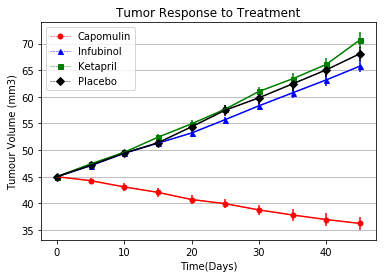

In [37]:
# Generate the Plot (with Error Bars)
x_axis=pivot_df.index.values
y_capomulin=pivot_df["Capomulin"]
y_Infubinol=pivot_df["Infubinol"]
y_Ketapril=pivot_df["Ketapril"]
y_Placebo=pivot_df["Placebo"]

xerr=0.1
yerr=pivot_sem_df["Capomulin"]

fig, ax = plt.subplots()

ax.errorbar(x_axis, y_capomulin, xerr=xerr, yerr=yerr,  color='red')
Capomulin,=plt.plot(x_axis,y_capomulin,color="red",marker='o',markersize=5, linestyle='--', linewidth=0.5)

yerr=pivot_sem_df["Infubinol"]
ax.errorbar(x_axis, y_Infubinol, xerr=xerr, yerr=yerr, color='blue')
Infubinol,=plt.plot(x_axis,y_Infubinol,color="blue", marker='^',markersize=5, linestyle='--', linewidth=0.5)

yerr=pivot_sem_df["Ketapril"]
ax.errorbar(x_axis, y_Ketapril, xerr=xerr, yerr=yerr,  color='green')
Ketapril,=plt.plot(x_axis,y_Ketapril,color="green",marker='s',markersize=5, linestyle='--', linewidth=0.5)

yerr=pivot_sem_df["Placebo"]
ax.errorbar(x_axis, y_Placebo, xerr=xerr, yerr=yerr, color='black')
Placebo,=plt.plot(x_axis,y_Placebo,color="black",marker='D', markersize=5, linestyle='--', linewidth=0.5)


ax.set_xlabel('Time(Days)')
ax.set_ylabel('Tumour Volume (mm3)')
ax.set_title('Tumor Response to Treatment')
ax.yaxis.grid(True)
plt.legend(handles=[Capomulin,Infubinol,Ketapril,Placebo],loc="best")
# Save the Figure
#plt.tight_layout()
plt.show()



In [31]:
pivot=pd.pivot_table(tumor_table, index=["Timepoint"], columns ="Drug").reset_index()
pivot

AttributeError: 'SeriesGroupBy' object has no attribute 'columns'

In [ ]:
# Plot sample means with error bars
x_axis=tumor_sem_df["Timepoint"]
y_axis=tumor_sem_df[["Capomulin","Ceftamin"]]
fig, ax = plt.subplots()

ax.errorbar(np.arange(0, len(x_axis)),x_axis , yerr=y_axis, fmt="o", color="b",
            alpha=0.5, label="Meta")

ax.set_xlim(-0.5, len(x_axis))

ax.set_xlabel("Sample Number")
ax.set_ylabel("Mean of Median House Prices")

plt.legend(loc="best", fontsize="small", fancybox=True)

plt.show()

In [ ]:
# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [39]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
meta_treat=pymaceuticals_df.groupby(["Drug","Timepoint"])['Metastatic Sites']
meta_mean=meta_treat.mean()

# Convert to DataFrame

meta_df=pd.DataFrame(meta_mean)


# Preview DataFrame
meta_df.reset_index(inplace=True)
meta_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [40]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
meta_sem = meta_treat.sem()

# Convert to DataFrame
meta_sem_df=pd.DataFrame(meta_sem)

# Preview DataFrame
meta_sem_df.reset_index(inplace=True)
meta_sem_df.head()





,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [ ]:
# Minor Data Munging to Re-Format the Data Frames

# Preview that Reformatting worked


In [ ]:
# Generate the Plot (with Error Bars)

# Save the Figure

# Show the Figure


## Survival Rates

In [41]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
survival_data=pymaceuticals_df.groupby(["Drug","Timepoint"])["Mouse ID"].count()

# Convert to DataFrame
survival_df=pd.DataFrame(survival_data)
# Preview DataFrame
survival_df.reset_index(inplace=True)
survival_df.head()

,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [ ]:
# Minor Data Munging to Re-Format the Data Frames

# Preview the Data Frame


In [ ]:
# Generate the Plot (Accounting for percentages)

# Save the Figure

# Show the Figure
plt.show()

## Summary Bar Graph

In [ ]:
# Calculate the percent changes for each drug

# Display the data to confirm


In [ ]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()